In [1]:
%run setup_for_testing
import interact_gui
import numpy as np

import os.path

In [2]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
import matplotlib.pyplot as plt
%matplotlib notebook

from ipywidgets import interact, fixed
from IPython.display import clear_output

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


## Read images

Provide the exact location of the Dicom dataset
If you are using a Windows machine, do not delete 'r'

In [3]:
input_dir_dicom = r"C:\Users\tszasz\Documents\Projects\RSNA_educational_grant\case_2\coronal T2W pt 18"

In [4]:
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(input_dir_dicom)
reader.SetFileNames(dicom_names)
image_dicom = reader.Execute()

size_dicom = image_dicom.GetSize()
spacing_dicom = image_dicom.GetSpacing()
print("Image size:", size_dicom[0], size_dicom[1], size_dicom[2], spacing_dicom)

Image size: 560 560 26 (0.2857142984867, 0.2857142984867, 3.0)


<IPython.core.display.Javascript object>


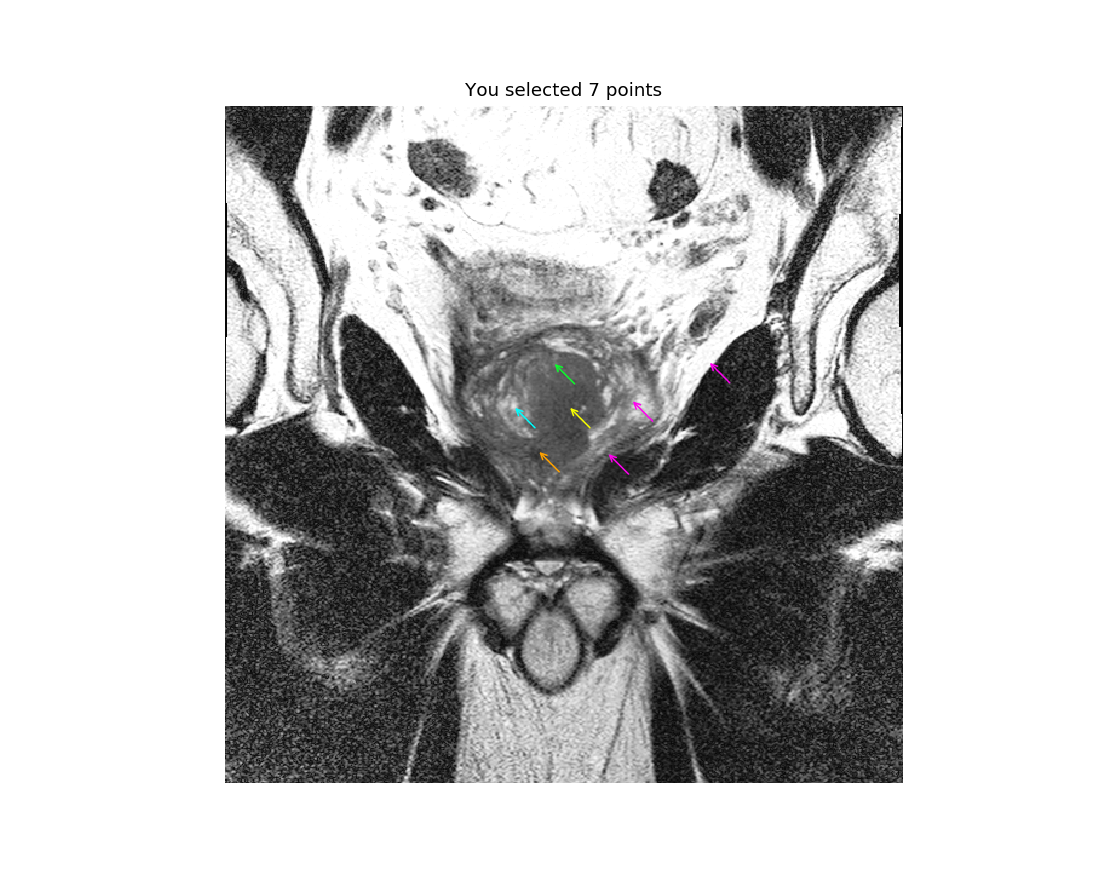

In [5]:
point_acquisition_interface = interact_gui.PointDataAquisition(image_dicom, window_level=(1700,800))

Save the selected location in a file (the file updates every time):

In [ ]:
selected_points=point_acquisition_interface.get_point_indexes()
series = input_dir_dicom.split("\\")[-1]
case_no = input_dir_dicom.split("\\")[-2]
filename = series + "_" + case_no

if os.path.exists(filename):
    os.remove(filename)
f= open("%s" % filename, "w+")
f.write('\n'.join('{} {} {}'.format(x[0],x[1], x[2]) for x in selected_points))
f.close()